In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [65]:
# Problem 1 
results = []
for i in range(100000):
    I_sample = np.random.normal(100, 15)
    I_prob = scipy.stats.norm.pdf(x=I_sample, loc = 100, scale = 15)
    I = 1 if np.random.rand() < I_prob else  0
    
    M = 1 if np.random.rand() < 1/ (1 + np.exp(-(I - 110) / 5)) else 0
    if M == 1:
        M_W = 1/ (1 + np.exp(-(I - 110) / 5))
    else:
        M_W = 1 - 1/ (1 + np.exp(-(I - 110) / 5))
    U_W = 1/ (1 + np.exp(-(I - 100) / 5))
    U = 1 if np.random.randn() < 1/ (1 + np.exp(-(I - 100) / 5)) else 0
    if U == 1:
        U_W = 1/ (1 + np.exp(-(I - 100) / 5))
    else:
        U_W = 1 - 1/ (1 + np.exp(-(I - 100) / 5))
    S = np.random.gamma(0.1 * I + M + 3 * U, 5)
    Weight = I * M_W * U_W 
    # 
    results.append([I, I_prob, M, M_W, U, U_W, S, Weight])
    

KeyboardInterrupt: 

In [66]:
def part1(S):
    results = []
    for i in range(150000):
        I = np.random.normal(100, 15)
        M = 1 if np.random.rand() < 1/ (1 + np.exp(-(I - 110) / 5)) else 0
        U = 1 if np.random.rand() < 1/ (1 + np.exp(-(I - 100) / 5)) else 0
    #     S = np.random.gamma(0.1 * I + M + 3 * U, 5)
        weight = scipy.stats.gamma.pdf(x=S, a=0.1 * I + M + 3 * U, scale=5)
        results.append([I, M, U, weight])
        
    df=pd.DataFrame(results)
    df.columns = ['I', 'M', 'U', 'W']
    
    MU_00 = df[(df['U'] == 0) & (df['M'] == 0)]
    MU_01 = df[(df['U'] == 0) & (df['M'] == 1)]
    MU_10 = df[(df['U'] == 1) & (df['M'] == 0)]
    MU_11 = df[(df['U'] == 1) & (df['M'] == 1)]

    total = df.W.sum()

    P_MU_00 = MU_00.W.sum() / total
    P_MU_01 = MU_01.W.sum() / total
    P_MU_10 = MU_10.W.sum() / total
    P_MU_11 = MU_11.W.sum() / total
    return P_MU_00, P_MU_01, P_MU_10, P_MU_11

In [67]:
# S = 120
P_MU_00, P_MU_01, P_MU_10, P_MU_11 = part1(120)

In [68]:
print(P_MU_00)
print(P_MU_01)
print(P_MU_10)
print(P_MU_11)

0.01412490956320269
0.007865412092912444
0.22289133296853506
0.7551183453753488


In [69]:
# S = 60
P_MU_00, P_MU_01, P_MU_10, P_MU_11 = part1(60)

In [70]:
print(P_MU_00)
print(P_MU_01)
print(P_MU_10)
print(P_MU_11)

0.36574463829265624
0.046265952726773765
0.34461418437684155
0.24337522460370953


In [71]:
# S = 20
P_MU_00, P_MU_01, P_MU_10, P_MU_11 = part1(20)

In [72]:
print(P_MU_00)
print(P_MU_01)
print(P_MU_10)
print(P_MU_11)

0.9825951671553128
0.008704532347008994
0.008161560188749226
0.0005387403089278853


In [77]:
# Part 2
mu = [1, 0]
sigma = [[1, -.5], [-.5, 3]]




In [101]:
def gibbs_sampler(mu_x=1, mu_y=0, sigma_xx=1, sigma_yy=3, sigma_xy=-.5, starting_y = 0, n_draws = 100000):
    x_samples = []
    y_samples = [starting_y]
    for i in range(n_draws):
        # compute mu and sigma for x given y
        mu_x_given_y = mu_x + float(sigma_xy) * float(sigma_yy**-1) * float(y_samples[-1] - mu_y)
        sigma_x_given_y = sigma_xx - float(sigma_xy) * float(sigma_yy ** -1) * float(sigma_xy)
        # Sample from normal of new mu/sigma
        x_sample = np.random.normal(mu_x_given_y, sigma_x_given_y)
        x_samples.append(x_sample)
        
        # Compute mu and sigma for y given x
        mu_y_given_x = mu_y + float(sigma_xy) * float(sigma_xx**-1) * float(x_samples[-1] - mu_x)
        sigma_y_given_x = sigma_yy - float(sigma_xy) * float(sigma_xx ** -1) * float(sigma_xy)
        # Sample from normal of new mu/sigma
        y_sample = np.random.normal(mu_y_given_x, sigma_y_given_x)
        y_samples.append(y_sample)
    return x_samples, y_samples


In [102]:
x_samples, y_samples = gibbs_sampler()

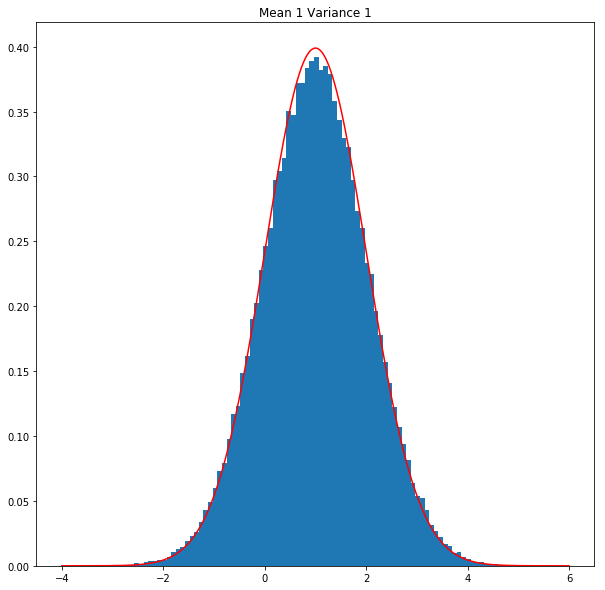

In [105]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)
true_x_xaxis = np.arange(-4, 6, 0.001)
ax1.plot(true_x_xaxis, scipy.stats.norm.pdf(true_x_xaxis, 1, 1), 'r')
ax1.hist(x_samples[20000:], bins=100, normed=True)
ax1.set_title("Mean 1 Variance 1")

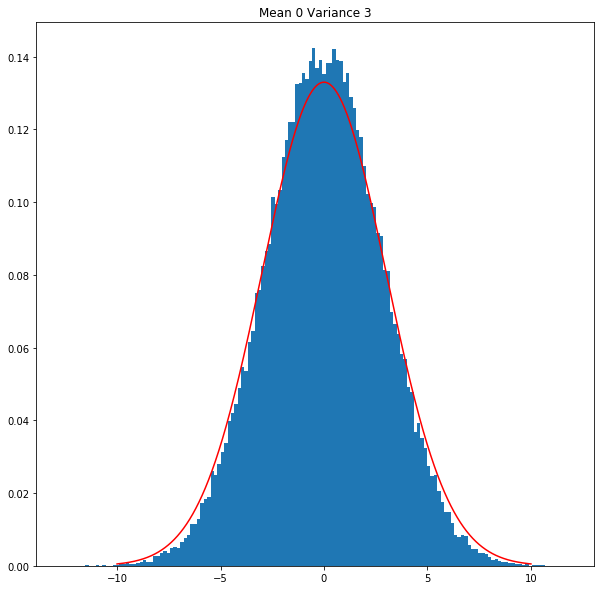

In [106]:
fig2 = plt.figure(figsize=(10, 10))
ax1 = fig2.add_subplot(111)
true_y_xaxis = np.arange(-10, 10, 0.0001)
ax1.plot(true_y_xaxis, scipy.stats.norm.pdf(true_y_xaxis, 0, 3), 'r')
ax1.hist(y_samples[20000:], bins=150, normed=True)
ax1.set_title("Mean 0 Variance 3")

In [234]:
mu_x_given_y = mu_x + float(sigma_xy) * float(sigma_yy**-1) * float(y_samples[-1] - mu_y)
sigma_x_given_y = sigma_xx - float(sigma_xy) * float(sigma_yy ** -1) * float(sigma_xy)
# Sample from normal of new mu/sigma
x_sample = np.random.normal(mu_x_given_y, sigma_x_given_y)
x_samples.append(x_sample)


NameError: name 'mu_x' is not defined

In [2]:
def conditional_normal(x, y):
    sigma = 1
    mu = y
    return scipy.stats.norm.pdf(x, y, sigma)

In [3]:
def f_function(f_current, f_prospective):
    if 1 < f_prospective or f_prospective < 0:
        return 0
    else:
        return float(f_prospective ** 3)/(f_current** 3)

In [4]:
def g_function(g_current, g_prospective, f_current):
    if 1 < g_prospective or g_prospective < 0:
        return 0
    else:
        return float(1 - abs(g_prospective - f_current))/float(1 - abs(g_current - f_current))

In [5]:
# Part 3
def metropolis_hastings(u_f0 = 0.5, u_g0=0.5, num_iters = 1000000):
    f_vals = [u_f0]
    g_vals = [u_g0]
    for i in range(num_iters):
        u_f = np.random.rand()
        u_g = np.random.rand()
       
        f_prospective = np.random.normal(loc = f_vals[-1])
        g_prospective = np.random.normal(loc = g_vals[-1])
        
        f_proposal = f_function(f_vals[-1], f_prospective) * conditional_normal(f_vals[-1], f_prospective) / conditional_normal(f_prospective, f_vals[-1])
        g_proposal = g_function(g_vals[-1], g_prospective, f_vals[-1]) * conditional_normal(g_vals[-1], g_prospective) / conditional_normal(g_prospective, g_vals[-1])
        
#         print(f_proposal)
#         print(g_proposal)
        if u_f < min(1, f_proposal):
#             f_vals.append(min(1, f_prospective))
            f_vals.append(min(1, f_prospective))
        else:
            f_vals.append(f_vals[-1])
        
        if u_g < min(1, g_proposal):
            g_vals.append(min(1, g_prospective))
        else:
            g_vals.append(g_vals[-1])
               
    return f_vals, g_vals

In [6]:
f_vals, g_vals = metropolis_hastings()

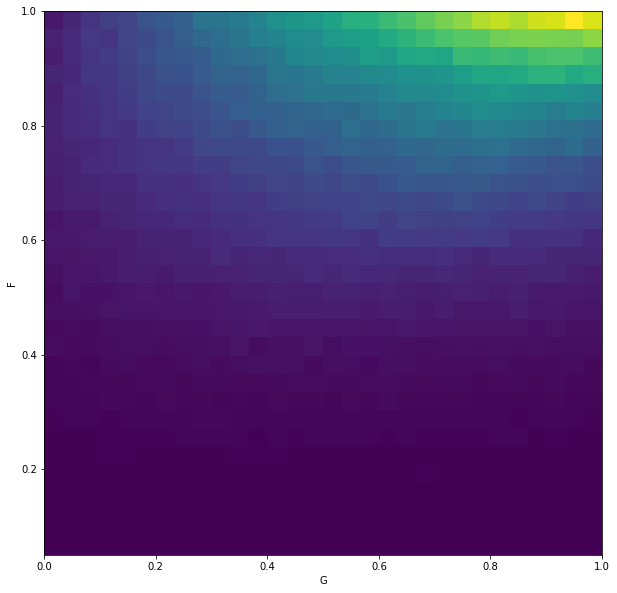

In [8]:
fig =plt.figure(figsize=(10, 10))
plt.hist2d(g_vals, f_vals, bins=(30, 30))
plt.xlabel("G")
plt.ylabel("F")

$$ \Sigma_f \Sigma_g (f * g * P(f, g))$$ 

In [59]:
h, xedges, yedges = np.histogram2d(g_vals, f_vals, bins=(30, 30))

In [60]:
n = h / sum(h)

In [51]:
xedges

array([  2.60241325e-06,   3.33354494e-02,   6.66682965e-02,
         1.00001144e-01,   1.33333991e-01,   1.66666838e-01,
         1.99999685e-01,   2.33332532e-01,   2.66665379e-01,
         2.99998226e-01,   3.33331073e-01,   3.66663920e-01,
         3.99996767e-01,   4.33329614e-01,   4.66662461e-01,
         4.99995308e-01,   5.33328155e-01,   5.66661002e-01,
         5.99993849e-01,   6.33326696e-01,   6.66659543e-01,
         6.99992390e-01,   7.33325237e-01,   7.66658084e-01,
         7.99990931e-01,   8.33323778e-01,   8.66656625e-01,
         8.99989472e-01,   9.33322319e-01,   9.66655166e-01,
         9.99988014e-01])

In [52]:
h

array([[  0.00000000e+00,   3.78993026e-03,   2.84244769e-03,
          1.32647559e-02,   1.13697908e-02,   4.07417503e-02,
          2.93719595e-02,   5.87439190e-02,   1.07065530e-01,
          1.12750425e-01,   9.19058088e-02,   2.18868472e-01,
          1.64861966e-01,   2.44450502e-01,   2.39713089e-01,
          3.12669246e-01,   4.12154916e-01,   4.32999532e-01,
          4.01732608e-01,   5.09745620e-01,   5.34380167e-01,
          6.02598911e-01,   6.30075906e-01,   6.69870173e-01,
          6.49025557e-01,   6.04493876e-01,   7.18191784e-01,
          5.21115411e-01,   6.24391010e-01,   4.71846317e-01],
       [  9.47482565e-04,   3.78993026e-03,   6.63237795e-03,
          9.47482565e-03,   2.27395816e-02,   2.17920990e-02,
          5.30590236e-02,   8.43259483e-02,   1.23172733e-01,
          1.30752594e-01,   1.45912315e-01,   1.69599379e-01,
          2.18868472e-01,   2.86139735e-01,   3.78993026e-01,
          4.06470020e-01,   3.62885822e-01,   4.72793800e-01,
       

In [23]:
hist[2]

array([ 0.05010153,  0.08176481,  0.11342809,  0.14509137,  0.17675466,
        0.20841794,  0.24008122,  0.2717445 ,  0.30340778,  0.33507107,
        0.36673435,  0.39839763,  0.43006091,  0.46172419,  0.49338748,
        0.52505076,  0.55671404,  0.58837732,  0.6200406 ,  0.65170389,
        0.68336717,  0.71503045,  0.74669373,  0.77835701,  0.8100203 ,
        0.84168358,  0.87334686,  0.90501014,  0.93667342,  0.96833671,
        0.99999999])

In [21]:
hist[1]

array([  2.60241325e-06,   3.33354494e-02,   6.66682965e-02,
         1.00001144e-01,   1.33333991e-01,   1.66666838e-01,
         1.99999685e-01,   2.33332532e-01,   2.66665379e-01,
         2.99998226e-01,   3.33331073e-01,   3.66663920e-01,
         3.99996767e-01,   4.33329614e-01,   4.66662461e-01,
         4.99995308e-01,   5.33328155e-01,   5.66661002e-01,
         5.99993849e-01,   6.33326696e-01,   6.66659543e-01,
         6.99992390e-01,   7.33325237e-01,   7.66658084e-01,
         7.99990931e-01,   8.33323778e-01,   8.66656625e-01,
         8.99989472e-01,   9.33322319e-01,   9.66655166e-01,
         9.99988014e-01])

In [22]:
hist[0]

array([[  0.00000000e+00,   3.78993026e-03,   2.84244769e-03,
          1.32647559e-02,   1.13697908e-02,   4.07417503e-02,
          2.93719595e-02,   5.87439190e-02,   1.07065530e-01,
          1.12750425e-01,   9.19058088e-02,   2.18868472e-01,
          1.64861966e-01,   2.44450502e-01,   2.39713089e-01,
          3.12669246e-01,   4.12154916e-01,   4.32999532e-01,
          4.01732608e-01,   5.09745620e-01,   5.34380167e-01,
          6.02598911e-01,   6.30075906e-01,   6.69870173e-01,
          6.49025557e-01,   6.04493876e-01,   7.18191784e-01,
          5.21115411e-01,   6.24391010e-01,   4.71846317e-01],
       [  9.47482565e-04,   3.78993026e-03,   6.63237795e-03,
          9.47482565e-03,   2.27395816e-02,   2.17920990e-02,
          5.30590236e-02,   8.43259483e-02,   1.23172733e-01,
          1.30752594e-01,   1.45912315e-01,   1.69599379e-01,
          2.18868472e-01,   2.86139735e-01,   3.78993026e-01,
          4.06470020e-01,   3.62885822e-01,   4.72793800e-01,
       

In [28]:
def get_index(val, axis_vals):
    for i in range(len(axis_vals)):
        if axis_vals[i] < val:
            return i - 1

In [31]:
# first index is g (x), second index is f (y)
expected_value = 0
for f in f_vals:
    y_idx = get_index(f, yedges)
    for g in g_vals:
        # get x index in histogram
        x_idx = get_index(g, xedges)
        expected_value += (g * f * h[y_idx][x_idx])
        print(expected_value)

1.61782647953
3.23565295906
4.85347943858
6.47130591811
9.34314624075
10.6590565234
11.9749668061
13.2908770887
14.6067873714
14.7825861646
14.9583849579
15.1341837511
15.3099825444
15.4857813377
17.0929551495
18.7001289613
20.5755666554
22.4510043495
25.2296144778
27.4806577728
29.5494709078
31.972057848
34.3946447882
37.5640744609
40.7335041336
43.9029338063
47.072363479
50.2417931517
53.4112228244
56.5806524971
59.7500821698
62.9195118425
66.0889415152
68.818216038
71.5474905607
74.2767650835
77.0060396063
79.7353141291
82.4645886519
85.1938631746
87.9231376974
90.0796414148
92.4805734104
94.8815054061
97.2824374017
97.889215613
98.4959938243
99.1027720356
99.7095502468
100.316328458
100.923106669
103.783640424
106.644174179
109.72139208
112.779408186
114.584799211
116.390190236
116.982047871
117.573905505
118.16576314
118.732670878
119.299578616
120.181560083
121.063541549
121.945523016
123.807670086
125.669817156
126.331648394
126.993479632
128.852401207
130.711322782
132.57024435

4360.70455948
4361.57022842
4363.70528308
4365.84033775
4367.29988014
4368.75942253
4370.21896491
4372.51601853
4374.81307215
4375.48120018
4376.1493282
4376.81745623
4379.94532653
4383.07319683
4385.67054349
4388.26789015
4390.86523682
4393.46258348
4395.49481933
4397.52705518
4400.56253557
4403.59801595
4406.63349633
4409.66897671
4412.70445709
4415.73993747
4417.71198666
4420.56873738
4421.26686641
4421.69923626
4422.14520171
4423.10135139
4424.05750108
4425.01365077
4425.96980046
4426.92595015
4427.88209984
4428.83824952
4430.37503337
4431.91181722
4433.44860107
4434.98538492
4437.9445886
4440.90379227
4443.86299595
4447.01501541
4450.16703488
4453.31905435
4453.38369081
4453.44832727
4453.51296373
4454.09060693
4455.29228613
4456.49396534
4458.73895196
4460.85112365
4462.96329534
4465.07546703
4467.18763872
4469.29981041
4471.4119821
4473.52415379
4475.63632547
4477.74849716
4479.86066885
4481.97284054
4484.08501223
4486.19718392
4488.30935561
4490.42152729
4492.66133534
4494.9011

10211.4186652
10211.8605799
10212.2269457
10215.4032695
10218.5795933
10221.755917
10224.8354103
10227.9149035
10230.9943968
10234.131449
10237.2685012
10240.4055535
10243.5426057
10246.6796579
10247.8515204
10249.0233828
10250.1952453
10252.8310328
10255.0786796
10257.3263264
10260.4501314
10263.5739363
10265.9858824
10268.3978284
10270.8853396
10273.3728508
10275.860362
10277.4627548
10279.0651475
10280.6675402
10283.0575097
10284.4680456
10285.8785815
10287.7354943
10289.4453446
10291.155195
10292.8650453
10294.5748957
10295.1642046
10297.402669
10299.6411334
10301.8795978
10304.4948358
10307.1100738
10309.7253119
10312.8492851
10315.9732583
10319.0972315
10322.2212047
10325.345178
10328.4691512
10331.5931244
10334.7170976
10335.9226213
10337.9857675
10340.0489138
10342.0870695
10344.1252251
10346.1633808
10346.6764018
10347.1894227
10347.7024437
10348.2154647
10351.0601745
10353.9048842
10357.1022385
10360.2995927
10363.4969469
10366.6943012
10368.2037526
10369.7955616
10371.387370

16295.8543715
16298.0466067
16300.2388418
16302.431077
16305.2884055
16307.8195989
16310.3507924
16312.8819858
16315.4131792
16317.9443726
16320.4755661
16323.0067595
16325.5379529
16328.0691464
16330.8226192
16333.5760921
16336.3295649
16338.8402621
16341.3509593
16344.1747828
16346.9986062
16349.5385492
16352.0784922
16354.6184352
16357.1583782
16359.6983212
16361.5542216
16363.4101221
16365.2660226
16367.4251233
16369.2837386
16371.1423538
16373.0009691
16374.8595843
16376.7181996
16378.5768149
16380.4354301
16382.2940454
16384.1526606
16386.0112759
16387.8698911
16389.7285064
16391.5871217
16393.0467618
16394.506402
16395.9660422
16398.0196285
16400.0732148
16402.1268011
16402.6503371
16403.173873
16403.697409
16404.220945
16404.7444809
16405.2680169
16405.7915529
16407.2853616
16409.2168728
16411.1483841
16413.0798953
16414.4439376
16415.8079798
16417.1720221
16418.5360643
16419.9001065
16421.9893402
16424.0785738
16426.1678074
16428.257041
16430.391471
16433.1882957
16435.6682296

22442.8233744
22443.3332757
22444.4522891
22445.5713025
22446.6903159
22447.8093293
22451.0039309
22454.1985324
22457.393134
22460.5877356
22462.8369877
22465.0862398
22466.9852799
22468.88432
22471.6163187
22474.3483174
22477.0803161
22479.8123148
22482.5443134
22485.2763121
22488.0083108
22490.7403095
22493.4723082
22496.6426371
22499.8129659
22502.9832947
22506.1536236
22509.3239524
22512.4942813
22514.829803
22516.8695971
22518.8941918
22520.9187865
22522.9433812
22524.9679759
22526.9925706
22529.0171653
22531.04176
22532.0247725
22532.6338597
22534.8375857
22537.0413117
22539.7078035
22542.3742952
22545.0407869
22547.7072786
22550.3737704
22553.0402621
22554.2639982
22555.4877343
22557.2600189
22559.0323035
22561.1171377
22563.2019719
22565.2868061
22567.3716403
22570.2122557
22573.0528712
22574.4802417
22575.9076122
22577.3349826
22578.7623531
22580.1897236
22581.6170941
22583.0444646
22584.4718351
22587.2198706
22589.9679062
22592.7159418
22595.4445319
22598.1731221
22600.901712

27539.8206753
27542.7480946
27545.6755138
27548.6029331
27551.5303524
27554.4577717
27557.3851909
27560.3126102
27563.2400295
27566.1674488
27569.094868
27571.8873858
27574.6799035
27577.4724212
27580.2649389
27583.0574566
27585.8499743
27588.6424921
27591.4350098
27594.2275275
27596.6357791
27599.0440306
27601.4522822
27604.2731961
27607.0941099
27609.9150237
27612.7359376
27615.5568514
27618.3777653
27621.1986791
27622.956831
27624.7149829
27626.4731348
27628.2312867
27629.9894387
27631.7475906
27633.5057425
27636.2523778
27638.9990131
27641.7456484
27643.0702296
27644.3948108
27645.7193921
27647.8308309
27649.9422697
27653.0030497
27656.0638297
27659.1246096
27662.1853896
27665.2461696
27668.3069496
27671.3677295
27674.4285095
27677.4892895
27678.6298059
27679.7703224
27680.5396396
27681.3089568
27684.0864608
27686.8639648
27687.7784429
27688.6929211
27691.0634402
27693.4339592
27695.8044783
27698.1749974
27700.5455165
27702.9160356
27705.2865547
27707.6570737
27710.0275928
27712.39

33724.3101809
33727.2224551
33730.1347293
33732.5176188
33734.9005083
33737.2833978
33739.774595
33742.2657922
33744.7569895
33747.2481867
33750.3235246
33753.3988625
33756.4742004
33759.5495383
33762.6248762
33765.7002141
33766.2352786
33766.7703431
33767.3054075
33767.840472
33768.3755365
33768.910601
33769.4422084
33769.9738158
33770.3525331
33770.7312504
33771.1099677
33771.236711
33771.3634543
33771.4901976
33771.6169409
33771.7436842
33773.8520154
33775.9603467
33778.0686779
33778.8887797
33779.7088814
33780.7165488
33781.7242161
33782.8659405
33784.2037216
33786.9688876
33789.7340536
33792.4992197
33795.2643857
33798.0295518
33800.7947178
33803.5598839
33806.3250499
33809.0902159
33811.855382
33814.620548
33817.3857141
33820.1508801
33822.9160461
33825.6812122
33828.4463782
33831.0367345
33833.4125321
33835.7883297
33838.1641273
33840.5399248
33843.742712
33846.9454991
33850.1482863
33850.9600715
33853.9366846
33856.9132977
33858.3138066
33860.2286427
33862.1434788
33864.058315


40585.8746263
40588.9649878
40592.0553494
40595.145711
40598.2360726
40601.3264341
40604.4495319
40607.5726297
40610.6957274
40613.8188252
40616.9419229
40620.0650207
40623.1881185
40624.9729021
40626.7576857
40628.5424693
40630.3272529
40632.1120365
40633.9320176
40635.7519988
40637.5719799
40639.3919611
40641.2119422
40643.0319234
40644.8519046
40646.6718857
40648.4918669
40650.311848
40651.7023068
40653.0927656
40654.4832243
40657.3301874
40660.1771504
40662.7120668
40665.2036215
40667.6951761
40670.1867308
40672.6782855
40675.1698401
40677.6613948
40680.1529495
40682.6445041
40685.1360588
40687.6276135
40690.1191681
40693.1405849
40696.1620016
40699.1834183
40702.2048351
40704.7999571
40707.3950791
40709.990201
40711.5104157
40713.0306304
40714.5508451
40716.0710598
40718.3206524
40719.6153656
40720.9100788
40722.204792
40723.4995052
40724.7942183
40726.0889315
40727.3836447
40729.1118104
40730.839976
40732.5681417
40734.2963073
40737.3995953
40739.4619466
40741.5242979
40743.58664

46726.488889
46728.9720658
46731.4552426
46733.9384194
46736.4215962
46738.904773
46741.3879499
46743.8711267
46746.3543035
46748.8374803
46751.3206571
46752.1676115
46754.6929733
46757.218335
46759.7436968
46762.2690586
46763.7372273
46765.205396
46766.6735648
46768.1417335
46769.3664208
46770.5911081
46771.8157954
46773.0404827
46774.26517
46776.8514351
46778.9127067
46780.9739783
46783.0352499
46783.989643
46784.9440361
46787.8289945
46790.727892
46793.6267895
46796.525687
46799.4245845
46802.323482
46803.9470051
46804.9220475
46806.7470282
46806.9948898
46807.1415846
46807.374336
46807.6070873
46807.8398387
46808.07259
46808.3053414
46809.8317525
46812.1259416
46814.4201308
46816.7143199
46819.0085091
46821.3026982
46823.5968874
46825.8910766
46828.1852657
46830.4794549
46832.773644
46835.0678332
46837.3620223
46839.6562115
46841.9504006
46844.2445898
46846.5387789
46848.8329681
46851.1271572
46854.2062734
46856.722748
46859.705203
46862.6876581
46865.6701132
46868.0564586
46870.05

53403.1830088
53405.3154373
53407.7823019
53410.2491665
53412.7160311
53413.2189386
53413.721846
53414.2247535
53414.7276609
53415.2305683
53415.7334758
53416.2363832
53416.7392907
53418.0865637
53419.4338368
53420.7811098
53422.1283829
53424.4824149
53426.8364469
53429.1904789
53431.5445109
53433.7821329
53436.0197549
53437.2142049
53438.3480267
53440.4091295
53442.4702322
53444.5313349
53446.4786483
53448.4259617
53450.3732751
53452.32593
53452.6000237
53452.8741175
53455.0719922
53457.2698669
53459.4677415
53461.6656162
53463.8634909
53465.3053908
53465.7971935
53466.2889962
53466.7807989
53467.2726017
53467.7644044
53468.2562071
53469.8500775
53472.9898315
53476.15846
53479.3270886
53482.4957171
53485.6643457
53488.8329742
53490.2050695
53490.8248779
53491.4446863
53492.0644947
53492.6843031
53493.3041115
53493.8971713
53494.2448128
53494.5924543
53494.9400958
53495.2877373
53495.6353788
53495.9830203
53496.3306618
53498.5365087
53500.7423555
53502.9482024
53505.1540492
53507.35989

59111.0465559
59113.8145436
59116.5825314
59119.3505191
59120.0679184
59120.7853177
59121.502717
59122.2201163
59122.9375156
59123.6549149
59126.4643596
59129.2738043
59132.0832491
59133.0906624
59134.0980758
59136.1828258
59138.2675759
59140.3523259
59142.4370759
59144.5218259
59146.6065759
59148.7029251
59150.7992743
59153.0596073
59155.8649109
59158.6702144
59161.475518
59164.2808215
59167.0861251
59169.8914286
59172.7470321
59175.6026355
59178.4582389
59181.3138423
59182.5472697
59183.6730676
59184.7988654
59185.9246633
59187.4720737
59189.0194842
59190.5668946
59192.1143051
59194.6304689
59197.3721396
59199.4501861
59200.8754476
59203.7518038
59205.0358848
59206.3199658
59207.6040468
59208.8881278
59210.1722088
59211.4562898
59214.0290905
59216.6018911
59219.1746918
59221.5911832
59223.005521
59224.4198588
59225.7965403
59227.1732218
59228.5499032
59229.9265847
59231.3032662
59232.6799476
59234.0566291
59235.4333106
59236.809992
59238.1866735
59240.8455561
59243.5044388
59246.1633

65266.0623364
65267.0366395
65268.0109426
65269.6534474
65271.4028944
65273.1523413
65274.9017883
65276.6512353
65278.4006823
65280.1501293
65281.8995762
65283.6490232
65285.3984702
65286.6864695
65287.9744688
65289.2322232
65290.4899776
65291.747732
65293.4631162
65295.1785005
65296.8938847
65300.0242275
65303.1545703
65306.2849131
65309.4152559
65312.4031985
65315.391141
65318.3790836
65321.3670262
65324.3549687
65327.3429113
65330.3308538
65333.3187964
65336.306739
65339.2946815
65342.2826241
65345.2705667
65346.7593895
65348.2482124
65349.7370353
65351.2258582
65352.714681
65354.2035039
65355.6923268
65357.6084029
65359.5244791
65359.7340123
65360.0968013
65360.4595904
65360.8223794
65361.1851685
65361.4620207
65361.738873
65363.2704349
65364.8019969
65366.3335588
65367.8651208
65369.3966827
65370.9282447
65373.7881381
65376.6480316
65379.507925
65382.3678185
65385.2277119
65388.0876054
65390.9474989
65393.8992717
65396.8510445
65400.0120271
65403.1730097
65404.5190056
65406.339949

71748.7112892
71751.4612559
71754.2112227
71756.9611894
71758.4028808
71759.8445721
71761.6513607
71763.4581493
71764.4308827
71765.4036161
71766.3763495
71769.3778748
71772.3794
71775.2047371
71778.0300742
71780.8554112
71783.9959252
71787.1364392
71790.2769533
71793.4174673
71796.5579813
71798.8064978
71799.7219259
71802.1456715
71805.0396904
71807.9337093
71810.8277283
71813.7217472
71816.6157661
71818.5814108
71820.5470555
71822.5127002
71824.4783449
71826.4439896
71828.4096343
71830.375279
71831.8222
71833.269121
71834.7160419
71835.7751649
71836.6540658
71839.5084184
71842.3627709
71845.2171234
71847.4898474
71849.7625713
71852.0352952
71853.1048756
71854.174456
71857.0606991
71859.9469423
71862.8331855
71865.7194286
71868.6056718
71870.7315553
71872.8809702
71875.2588305
71877.6366907
71880.0145509
71882.3924111
71884.7702714
71887.1481316
71889.5259918
71892.1109965
71894.6960013
71896.0234579
71898.7194342
71901.4154106
71904.1113869
71906.8073633
71909.5033397
71912.199316
71

77380.7885995
77382.2083988
77383.6281982
77385.0479975
77386.4677969
77389.2907468
77390.4400664
77391.5893861
77392.7387058
77393.8880255
77395.0373452
77396.1866649
77399.1395375
77402.0924101
77405.0452828
77407.9981554
77410.9510281
77413.9039007
77416.8567734
77419.809646
77422.7625186
77423.6774037
77425.2291078
77427.5647276
77429.9003474
77432.840072
77435.6417577
77438.4434434
77441.6635283
77443.8205693
77445.9776103
77448.1346512
77450.2916922
77452.4487332
77452.4902434
77455.6246755
77458.7591077
77461.7242793
77464.6894509
77467.6546225
77469.9644722
77472.2743219
77474.5841716
77474.734943
77474.8857144
77477.6286716
77480.3716288
77483.1145859
77485.8575431
77488.6005003
77491.3084946
77494.0164888
77496.7244831
77499.4324774
77502.1404716
77504.8484659
77507.5564602
77510.2644544
77512.1988454
77514.1332364
77515.1004374
77516.0676384
77518.077523
77520.0874075
77522.097292
77523.5238984
77524.7580816
77525.9922648
77527.226448
77528.4606312
77529.6948144
77530.928997

81464.9047012
81465.7658778
81466.6270545
81467.1379149
81467.6487754
81468.1596358
81468.8671095
81469.5745831
81470.2820567
81470.9895303
81473.5753632
81476.161196
81478.7470288
81481.3328616
81483.9186944
81486.5045272
81489.09036
81489.4203491
81489.8523687
81490.2843884
81492.1930827
81494.1017769
81496.0104711
81499.178727
81502.3469828
81505.5152387
81507.1651793
81508.3172762
81509.4693732
81510.6214701
81511.1165555
81514.1228319
81515.4623126
81516.8017933
81518.1412739
81519.4807546
81521.166625
81522.8524954
81524.5383658
81526.2242361
81527.9101065
81529.5959769
81531.6868291
81533.6569475
81535.6270658
81537.6064916
81539.3008279
81541.1503369
81542.9998458
81544.5213628
81546.0428797
81547.5643967
81549.1321971
81550.9647523
81552.9401854
81554.9156186
81555.3513776
81555.7871366
81556.2228957
81556.6586547
81557.0944137
81557.5301727
81557.9659318
81558.9259808
81559.4621058
81559.9982307
81560.5343557
81561.1103043
81561.6862529
81562.2622015
81562.8381502
81563.41409

88434.1190442
88436.8549673
88439.9095088
88441.7843851
88444.9373002
88447.5447918
88450.1522833
88452.7597749
88455.3672664
88457.974758
88460.5822496
88463.1897411
88465.7972327
88468.442407
88470.6375435
88472.83268
88475.0278165
88477.3408367
88479.6538569
88481.9668771
88484.2798974
88486.5929176
88488.0338347
88489.4747518
88490.9156689
88492.356586
88493.9190737
88495.4815614
88497.0440491
88498.6065368
88499.7373712
88500.8682055
88501.9990399
88504.5057518
88507.0124637
88509.5191757
88512.0258876
88514.6067885
88517.1876894
88519.7685904
88521.7428997
88524.4573526
88526.3114997
88528.1656468
88530.019794
88531.8739411
88533.7280883
88535.5822354
88537.4363826
88539.2905297
88541.1446769
88544.3033934
88547.46211
88548.920702
88550.3792941
88551.8378861
88553.2964782
88554.7994345
88556.3023908
88557.805347
88559.3083033
88560.8112596
88562.3142159
88563.8171722
88565.3201285
88566.8230847
88568.7970469
88570.7710091
88572.7449713
88574.7189335
88576.6928957
88578.6668579
88

94902.6937318
94904.6454938
94906.5972558
94908.5490178
94910.5007798
94912.178266
94913.8557522
94915.5332384
94917.2107247
94918.8882109
94920.5656971
94922.2431833
94924.9466505
94927.6501177
94930.3535849
94932.3321088
94934.3106327
94936.2891566
94938.2676805
94939.412092
94940.5565034
94942.4568351
94944.3571668
94946.2574985
94948.1578302
94950.0581619
94951.9584936
94953.8588253
94955.759157
94957.6594887
94959.2128869
94960.7662851
94962.3196833
94963.8730815
94965.4264797
94966.9798779
94968.533276
94970.0866742
94971.1609283
94972.2351824
94974.0355078
94975.8358331
94977.6361585
94978.0305143
94979.5832601
94980.9758308
94982.3684015
94982.7869019
94983.2054023
94983.6239026
94985.8210334
94988.0181642
94990.2152949
94992.4124257
94994.6095564
94996.8066872
94998.772081
95001.6481028
95003.6877699
95005.727437
95007.7671042
95009.8067713
95011.8464384
95013.8861056
95015.9257727
95017.9654398
95020.0051069
95022.0447741
95024.0844412
95026.1241083
95028.1637755
95030.203442

102001.294654
102004.43218
102006.613943
102008.795705
102010.977468
102013.159231
102015.340994
102017.522756
102019.704519
102019.84786
102019.991202
102020.134543
102021.800399
102023.466255
102025.132112
102026.797968
102028.279461
102029.760954
102031.242447
102032.72394
102033.131639
102033.539339
102035.703713
102037.540653
102038.313413
102039.193269
102040.073125
102040.952981
102041.832837
102042.712693
102043.592549
102044.472406
102045.352262
102048.157281
102050.9623
102053.76732
102055.498176
102057.229031
102058.959887
102060.690743
102062.421599
102063.95691
102065.492222
102067.059568
102068.626914
102070.194259
102071.761605
102073.159008
102074.556412
102075.953815
102077.351218
102078.748621
102079.567874
102080.387127
102081.20638
102082.025633
102082.844886
102083.664139
102084.483392
102085.779084
102087.074777
102089.385636
102091.696495
102093.4075
102095.118504
102096.829508
102099.189611
102101.549714
102103.909817
102106.889264
102109.868711
102111.478326
10

108463.613983
108466.63776
108468.468514
108469.539479
108470.610443
108471.681408
108472.752372
108473.823337
108474.894302
108477.017461
108479.14062
108480.306367
108481.472115
108483.844132
108486.909245
108489.974358
108492.964581
108495.954805
108498.36608
108500.777354
108503.188629
108505.599904
108508.011179
108510.422454
108512.833729
108515.245003
108517.261536
108519.278068
108522.314824
108525.198918
108528.083012
108530.967106
108533.363835
108533.759026
108534.154217
108537.059447
108539.964677
108542.869908
108545.313745
108547.757583
108550.20142
108552.645258
108555.866739
108559.088219
108562.3097
108565.531181
108568.752662
108571.974142
108575.195623
108578.417104
108581.638585
108584.860066
108587.166313
108589.472561
108591.778808
108594.085056
108596.391304
108598.697551
108601.003799
108603.310046
108605.616294
108607.922541
108611.035702
108614.148862
108617.262022
108620.375183
108623.488343
108626.100306
108628.712269
108631.324231
108631.586855
108631.84947

115350.912827
115353.122072
115355.331317
115357.540561
115359.749806
115361.959051
115364.168296
115366.377541
115368.586786
115371.454457
115374.322129
115377.189801
115380.057472
115382.925144
115385.570807
115388.018293
115390.762204
115393.506115
115395.811949
115398.117783
115400.655351
115403.192919
115404.403139
115405.613359
115406.823579
115408.033799
115409.244019
115410.454239
115411.664458
115412.874678
115415.211447
115417.548216
115419.884984
115422.221753
115424.805599
115427.389446
115429.973292
115432.557138
115435.140985
115437.556422
115440.495046
115443.692752
115446.890457
115448.21277
115449.535082
115450.857394
115452.179706
115453.502018
115454.82433
115456.146643
115457.468955
115458.210969
115460.880828
115462.867693
115464.854557
115466.841422
115468.828287
115470.815152
115472.802016
115474.788881
115476.68356
115478.578238
115480.472916
115482.367595
115484.1436
115485.919606
115487.695611
115489.471617
115491.247622
115493.023628
115495.669601
115498.3155

121894.214524
121896.235012
121898.255501
121900.275989
121903.133136
121905.990284
121908.847432
121911.438751
121914.03007
121916.621389
121919.212708
121921.804027
121924.395346
121926.986665
121929.577984
121930.584231
121931.590479
121932.596726
121933.602973
121936.809313
121940.015652
121942.3549
121944.694147
121947.033395
121948.209746
121949.386097
121951.738529
121954.328995
121957.091313
121957.833898
121958.576483
121959.319069
121960.061654
121960.804239
121961.546825
121962.28941
121963.031995
121963.774581
121964.517166
121965.259751
121966.002336
121966.744922
121967.487507
121970.522071
121973.556636
121975.515059
121977.473482
121979.431904
121981.390327
121983.34875
121985.307173
121987.265596
121990.32426
121993.382925
121996.413008
121999.443092
122002.473175
122005.028679
122007.584182
122010.139686
122012.69519
122015.250693
122017.099971
122018.949249
122020.798527
122022.768442
122024.738356
122026.708271
122028.637282
122031.161082
122033.497768
122035.834454

126371.238257
126373.260128
126375.282
126377.303871
126378.981152
126380.658434
126382.03421
126383.041325
126384.08327
126384.171911
126384.260552
126385.59892
126386.937288
126389.549019
126392.16075
126393.368542
126394.576333
126395.784125
126396.991916
126398.199708
126399.407499
126400.61529
126402.411047
126404.206803
126406.453976
126408.70115
126410.948323
126413.195497
126415.44267
126416.582878
126417.723085
126420.38549
126423.047895
126425.7103
126428.372704
126431.035109
126433.697514
126434.879385
126436.061256
126437.243126
126438.424997
126440.199148
126442.16857
126445.339694
126448.510817
126451.68194
126454.255002
126455.743274
126457.231547
126458.71982
126459.13021
126459.5406
126459.950991
126460.361381
126460.771771
126462.385614
126463.999457
126464.999819
126466.000181
126467.000543
126468.119337
126469.585983
126471.052628
126472.519273
126473.985918
126475.075827
126476.707385
126478.338943
126479.9705
126481.602058
126483.233616
126484.865174
126486.496731

132645.55971
132646.817199
132647.329438
132647.841677
132648.353916
132648.866155
132649.378393
132649.890632
132650.402871
132650.91511
132651.427349
132652.832475
132655.289251
132657.746026
132660.202801
132662.659577
132665.116352
132667.644681
132670.173011
132672.70134
132673.781224
132676.333705
132678.886187
132681.438668
132683.99115
132686.543631
132689.096112
132691.648594
132693.31679
132694.984986
132696.653183
132698.321379
132699.98551
132701.64964
132703.313771
132705.177978
132707.042184
132708.117317
132709.19245
132711.039344
132713.075472
132714.275177
132715.474881
132716.674586
132717.87429
132719.073994
132720.273699
132721.473403
132722.673108
132723.872812
132725.072517
132726.272221
132727.471925
132728.67163
132729.871334
132731.071039
132733.460627
132735.850216
132738.239805
132739.086808
132739.933811
132740.668076
132741.40234
132744.10985
132746.81736
132749.52487
132752.23238
132755.323479
132757.542756
132759.785179
132762.027602
132764.270025
132766.

139426.151199
139427.630019
139429.108839
139430.587658
139432.066478
139433.545298
139435.227884
139436.91047
139438.593056
139440.275641
139440.819559
139441.964912
139443.110266
139444.255619
139445.400972
139446.546326
139446.80168
139447.057034
139447.312389
139447.567743
139447.823098
139448.528587
139450.626882
139452.725177
139455.808506
139458.891836
139461.746202
139464.600568
139467.454934
139470.3093
139473.163666
139475.818531
139478.473396
139481.481893
139484.49039
139487.498886
139490.507383
139493.51588
139496.524376
139499.532873
139502.283562
139505.034251
139506.380718
139507.727184
139509.073651
139510.420117
139511.766583
139512.370914
139512.975244
139513.579574
139514.114795
139514.650016
139516.880904
139519.111791
139521.342678
139523.573565
139525.804452
139528.03534
139530.266227
139532.497114
139534.728001
139536.958889
139539.189776
139541.420663
139543.65155
139545.882437
139548.113325
139550.344212
139552.728034
139555.111857
139557.49568
139559.879502
1

146277.674175
146280.21847
146282.762765
146284.60028
146286.437796
146288.003086
146289.568376
146291.133666
146292.698955
146293.264753
146293.830551
146295.269187
146295.868878
146296.468568
146297.068259
146297.66795
146298.26764
146298.867331
146299.467022
146300.378331
146303.120036
146305.861742
146308.603448
146311.345153
146314.086859
146317.202449
146320.318039
146323.433629
146326.549219
146329.664808
146332.780398
146335.951728
146339.123058
146342.294387
146344.943779
146347.593171
146350.242562
146352.891954
146355.541346
146358.190737
146359.639207
146361.476897
146363.314588
146365.152279
146366.98997
146368.827661
146370.665352
146372.503042
146374.340733
146375.3329
146376.463394
146377.593889
146378.724384
146379.854879
146380.843526
146381.832174
146382.820822
146383.80947
146384.798117
146385.34571
146387.723788
146390.101866
146391.962225
146393.822584
146396.384071
146398.538451
146399.467539
146399.709453
146399.951367
146400.193281
146400.435195
146400.677109
1

153146.084749
153148.718283
153151.351817
153153.98535
153156.618884
153159.383782
153162.14868
153164.913578
153167.678476
153170.443374
153172.300287
153173.226712
153174.153137
153175.977088
153177.80104
153179.624991
153181.448943
153183.272894
153185.096845
153186.920797
153187.361396
153187.801996
153187.893294
153187.984591
153188.445124
153188.905658
153189.366192
153189.826725
153190.287259
153190.747793
153191.208326
153191.66886
153192.129394
153192.850655
153193.79896
153195.264093
153196.729226
153198.194359
153199.659492
153201.124283
153202.589073
153204.053863
153205.518653
153206.983443
153208.448233
153209.913024
153211.377814
153212.842604
153214.307394
153215.772184
153217.236974
153218.701765
153219.7901
153220.854831
153221.919563
153222.984294
153224.049026
153225.113758
153227.229837
153229.345917
153231.461997
153233.578077
153235.694157
153237.810236
153239.926316
153241.531382
153242.605896
153243.171861
153243.737826
153244.303791
153245.901558
153247.499325

159324.714165
159327.268788
159329.823411
159332.378035
159334.932658
159336.539732
159339.391458
159342.243184
159345.09491
159348.276804
159351.458698
159354.640593
159357.822487
159361.004381
159363.289102
159364.3995
159365.509898
159367.362918
159368.442091
159370.533251
159372.624411
159374.71557
159376.80673
159380.021661
159383.236592
159386.451522
159388.925531
159391.399539
159393.873547
159396.347556
159398.821564
159401.295572
159403.769581
159405.733605
159407.697629
159409.661653
159412.572234
159415.482815
159418.001116
159420.356738
159422.712359
159424.457802
159425.868177
159427.095335
159428.322493
159429.549651
159430.776809
159432.003967
159433.231125
159435.402078
159436.710177
159438.018275
159440.320237
159442.622198
159444.92416
159447.226121
159449.528083
159451.830044
159454.132005
159456.433967
159458.735928
159461.03789
159464.153336
159466.452364
159468.403589
159470.041301
159471.474089
159472.906877
159474.96011
159477.013343
159479.066576
159481.119809


165085.888547
165088.895482
165089.01611
165089.136737
165090.811858
165092.486979
165094.1621
165095.837221
165097.512342
165099.187464
165100.862585
165103.953487
165107.04439
165110.135292
165113.226194
165116.433236
165119.640278
165122.84732
165126.054363
165129.261405
165132.468447
165135.675489
165138.882531
165142.089573
165145.296615
165146.672248
165148.047881
165149.423514
165150.799147
165152.17478
165153.550413
165154.762063
165156.889097
165158.621129
165159.957862
165161.294595
165162.631328
165163.710329
165164.78933
165165.86833
165168.60841
165171.166133
165173.365952
165175.565771
165177.765589
165179.965408
165182.165227
165184.365046
165186.564864
165188.764683
165190.964502
165193.164321
165195.364139
165197.563958
165199.763777
165201.963596
165204.163414
165206.363233
165208.563052
165209.490164
165210.417276
165213.229356
165216.041436
165219.185568
165222.3297
165223.209081
165225.233889
165227.258697
165229.283505
165231.308314
165234.391812
165236.243772
165

169084.280172
169085.1736
169086.067027
169086.960455
169087.853883
169088.74731
169089.640738
169092.515293
169095.389848
169098.264403
169101.138958
169104.013512
169106.888067
169109.762622
169112.637177
169115.511732
169118.386287
169121.269125
169123.505585
169125.742045
169127.978504
169130.214964
169132.451424
169133.101436
169133.751448
169134.401459
169134.901635
169135.40181
169135.901985
169136.40216
169137.255974
169138.109788
169138.963601
169140.672685
169143.389782
169146.106878
169148.823974
169151.541071
169154.258167
169156.741052
169159.223937
169161.706822
169164.189706
169166.672591
169169.155476
169171.638361
169173.127314
169174.616268
169176.105221
169177.594175
169179.083128
169180.572081
169182.061035
169183.220288
169186.07517
169188.930053
169191.784936
169194.158401
169196.452988
169196.768007
169197.083025
169197.398044
169197.713063
169198.028082
169198.343101
169200.157345
169203.158389
169206.070727
169208.983065
169210.118897
169211.25473
169212.390562

175679.383627
175682.386105
175685.388584
175687.099866
175688.811148
175690.522431
175692.233713
175693.953143
175694.977786
175696.002429
175697.027072
175698.051715
175699.864625
175701.677535
175703.490445
175705.303355
175707.106755
175708.910155
175710.713555
175712.516955
175714.320355
175716.123755
175716.338709
175717.35982
175718.380931
175719.402042
175720.423153
175720.836607
175721.250062
175721.507992
175721.765922
175722.023853
175723.021517
175724.019181
175725.016846
175726.01451
175727.012175
175730.22227
175733.432366
175736.642461
175739.852557
175741.880764
175743.908971
175745.937177
175747.965384
175749.993591
175752.021798
175754.673326
175757.324854
175758.035255
175758.745656
175759.456057
175760.166458
175760.876859
175762.910424
175765.115477
175767.320529
175768.783818
175770.247107
175771.710395
175772.417384
175773.124373
175773.68084
175774.237307
175774.793774
175775.35024
175775.906707
175778.121103
175780.335499
175782.549894
175785.196501
175787.8431

181880.384607
181882.425003
181884.4654
181886.505797
181888.546193
181890.58659
181890.73604
181890.88549
181891.053718
181891.221947
181891.390176
181891.558404
181894.368928
181897.179452
181899.989975
181902.800499
181905.630999
181908.461499
181911.291999
181913.569141
181916.769944
181919.278473
181921.787003
181924.295532
181926.804062
181929.312591
181931.408187
181933.002742
181934.597296
181936.19185
181936.912692
181937.633535
181938.354377
181939.912432
181941.470488
181943.028543
181944.586598
181946.144654
181947.859118
181950.576075
181953.293031
181956.009988
181958.726945
181961.443901
181964.252206
181967.060511
181969.868815
181971.594194
181973.319573
181975.044952
181976.770331
181978.495709
181980.221088
181981.946467
181983.183243
181986.057255
181987.701994
181989.346734
181990.991474
181992.636214
181994.280954
181994.565137
181994.849321
181995.133505
181995.417689
181995.701873
181995.986057
181996.270241
181996.554424
181996.838608
181997.336056
181997.83350

KeyboardInterrupt: 

In [32]:
h

array([[  0.00000000e+00,   3.78993026e-03,   2.84244769e-03,
          1.32647559e-02,   1.13697908e-02,   4.07417503e-02,
          2.93719595e-02,   5.87439190e-02,   1.07065530e-01,
          1.12750425e-01,   9.19058088e-02,   2.18868472e-01,
          1.64861966e-01,   2.44450502e-01,   2.39713089e-01,
          3.12669246e-01,   4.12154916e-01,   4.32999532e-01,
          4.01732608e-01,   5.09745620e-01,   5.34380167e-01,
          6.02598911e-01,   6.30075906e-01,   6.69870173e-01,
          6.49025557e-01,   6.04493876e-01,   7.18191784e-01,
          5.21115411e-01,   6.24391010e-01,   4.71846317e-01],
       [  9.47482565e-04,   3.78993026e-03,   6.63237795e-03,
          9.47482565e-03,   2.27395816e-02,   2.17920990e-02,
          5.30590236e-02,   8.43259483e-02,   1.23172733e-01,
          1.30752594e-01,   1.45912315e-01,   1.69599379e-01,
          2.18868472e-01,   2.86139735e-01,   3.78993026e-01,
          4.06470020e-01,   3.62885822e-01,   4.72793800e-01,
       

In [61]:
expected_value = 0
for y_idx, y in enumerate(yedges[:-1]):
#     y_idx = get_index(f, yedges)
    for x_idx, x in enumerate(xedges[:-1]):
        # get x index in histogram
        expected_value += (y * x * n[y_idx][x_idx])


In [62]:
expected_value

8.416378476953783

In [35]:
len(h[0])

30

In [36]:
len(yedges)

31

In [39]:
yedges[-1]

0.99999998791231481

In [47]:
for i, v in enumerate(yedges):
    print(v)
    print(i)

0.0501015269162
0
0.0817648089494
1
0.113428090983
2
0.145091373016
3
0.176754655049
4
0.208417937082
5
0.240081219115
6
0.271744501149
7
0.303407783182
8
0.335071065215
9
0.366734347248
10
0.398397629281
11
0.430060911315
12
0.461724193348
13
0.493387475381
14
0.525050757414
15
0.556714039447
16
0.588377321481
17
0.620040603514
18
0.651703885547
19
0.68336716758
20
0.715030449613
21
0.746693731647
22
0.77835701368
23
0.810020295713
24
0.841683577746
25
0.873346859779
26
0.905010141813
27
0.936673423846
28
0.968336705879
29
0.999999987912
30


In [55]:
prod = [f_vals[i] * g_vals[i] for i in range(len(g_vals))]

In [56]:
np.mean(prod)

0.48434190452705522